In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from pandas_profiling import ProfileReport
from plotly.offline import iplot
!pip install joypy
import joypy

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs

data = pd.read_csv('../input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv')
study_data = pd.read_csv('../input/palmer-archipelago-antarctica-penguin-data/penguins_lter.csv')

<table style="font-size: 20px; width: 100%">
    <tr>
        <th style="float: left"><h1>Contents</h1></th>
    </tr>
    <tr>
        <th style="float: left">1. Describing the data</th>
    </tr>
    <tr>
        <th style="float: left">2. Filling in missing values</th>
    </tr>
    <tr>
        <th style="float: left">3. Distribution of the variables</th>
    </tr>
    <tr>
        <th style="float: left">4. Correlation of the variables</th>
    </tr>
    <tr>
        <th style="float: left">5. Extreme values of the variables</th>
    </tr>
    <tr>
        <th style="float: left">6. Creating classifier for gender prediction</th>
    </tr>
</table>

<h1 style="font-size:40px">Describing the data</h1>

<img src="https://previews.123rf.com/images/aomeditor/aomeditor1903/aomeditor190300021/122254680-illustrator-of-body-parts-of-penguin.jpg" height='600px' width='400px'>

### <b>Columns in the dataset</b>
<ul>
    <li><b>Species: </b>penguin species (Chinstrap, Adélie, or Gentoo)</li>
    <li><b>Island: </b>island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)</li>
    <li><b>culmen_length_mm: </b>culmen length (mm)</li>
    <li><b>culmen_depth_mm: </b>culmen depth (mm)</li>
    <li><b>flipper_length_mm: </b>flipper length (mm)</li>
    <li><b>body_mass_g: </b>body mass (g)</li>
    <li><b>Sex: </b>penguin sex</li>
</ul>

### What is culmen?

The upper margin of the beak or bill is referred to as the culmen and the measurement is taken using calipers with one jaw at the tip of the upper mandible and the other at base of the skull or the first feathers depending on the standard chosen.

## Various observations of the data

In [2]:
# description

data.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [3]:
#Covariance

data.cov()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [4]:
#correlation

data.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


### Number of entries in data for each species

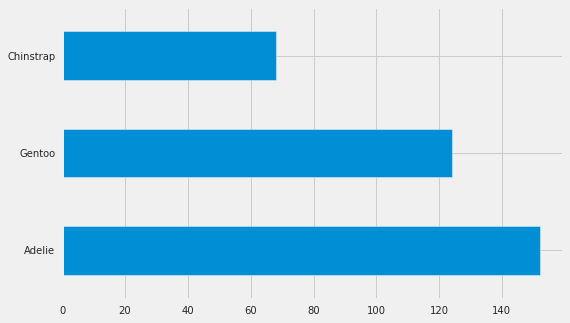

In [5]:
data['species'].value_counts().plot(kind='barh')
plt.show()

It can be observed that unlike the Iris dataset, this data contains different number of entries for each species

<h1 style="font-size:40px">Filling in missing values</h1>

In [6]:
#checking number of null values in the data
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
# Dropping the 2 rows with null values for all variables

data.drop(data[data['body_mass_g'].isnull()].index,axis=0, inplace=True)

In [8]:
#imputing the null values in sex with its mode

data['sex'] = data['sex'].fillna(data['sex'].mode())

<h1 style="font-size:40px">Distribution of the variables</h1>

Culmen Length Distribution


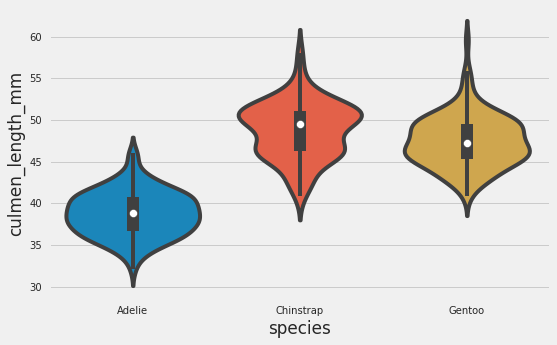

In [9]:
print('Culmen Length Distribution')
sns.violinplot(data=data, x="species", y="culmen_length_mm", size=8)
plt.show()

Culmen Depth Distribution


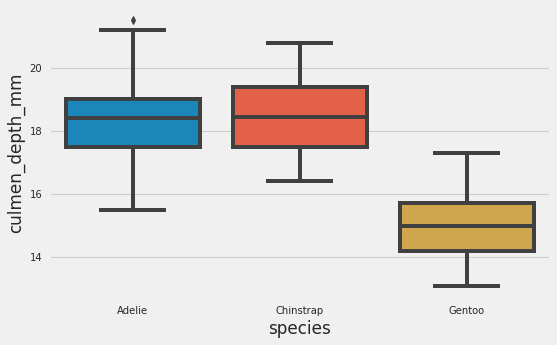

In [10]:
print('Culmen Depth Distribution')
sns.boxplot(data=data, x="species", y="culmen_depth_mm")
plt.show()

In [11]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


Flipper Length Distribution


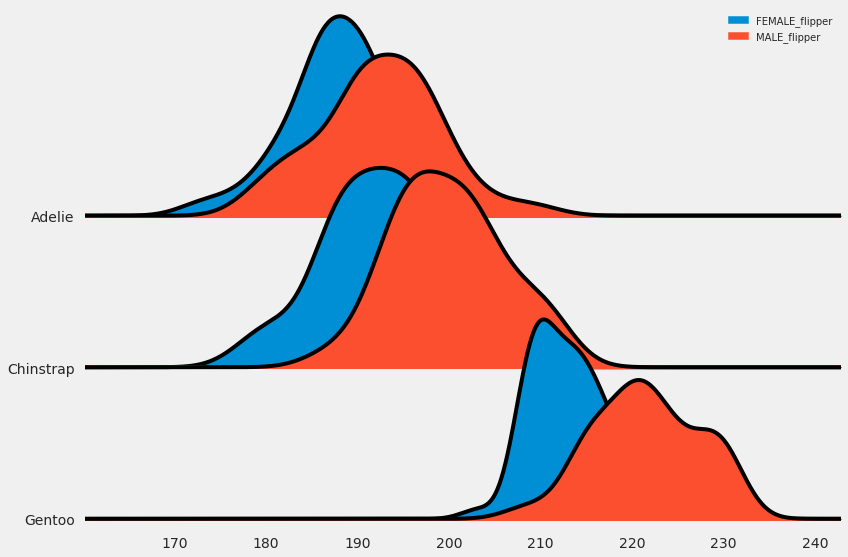

In [12]:
print('Flipper Length Distribution')
df = data.copy()
df["MALE_flipper"] = df.apply(lambda row: row["flipper_length_mm"] if row["sex"] == "MALE" else np.nan, axis = 1)
df["FEMALE_flipper"] = df.apply(lambda row: row["flipper_length_mm"] if row["sex"] == "FEMALE" else np.nan, axis = 1)
fig, axes = joypy.joyplot(df, 
                          column=['FEMALE_flipper', 'MALE_flipper'],
                          by = "species",
                          ylim = 'own',
                          figsize = (12,8), 
                          legend = True
                         )

Body Mass Distribution


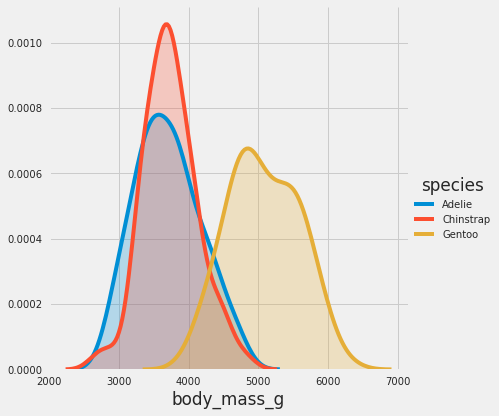

In [13]:
print('Body Mass Distribution')
sns.FacetGrid(data, hue="species", height=6,).map(sns.kdeplot, "body_mass_g",shade=True).add_legend()
plt.show()

<h1 style="font-size:40px">Correlation of the variables</h1>

culmen_length vs culmen_depth


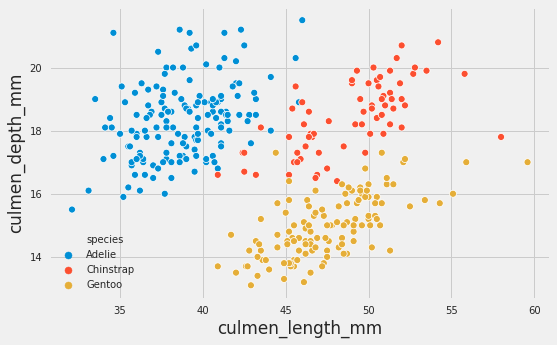

In [14]:
print('culmen_length vs culmen_depth')
sns.scatterplot(data=data, x='culmen_length_mm', y='culmen_depth_mm', hue='species')
plt.show()

culmen_length vs flipper_length


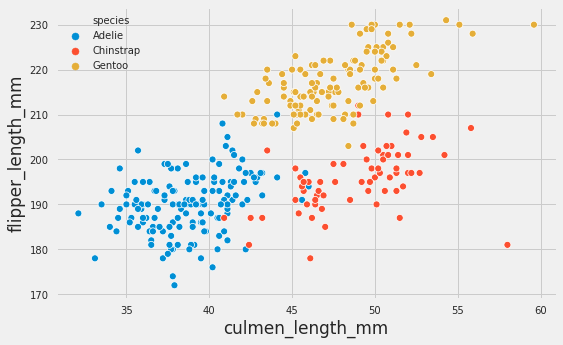

In [15]:
print('culmen_length vs flipper_length')
sns.scatterplot(data=data, x='culmen_length_mm', y='flipper_length_mm', hue='species')
plt.show()

culmen_depth vs flipper_length


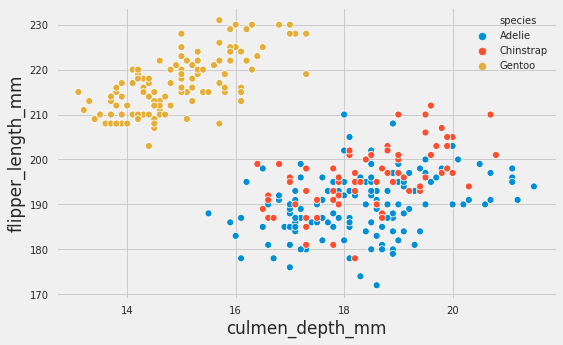

In [16]:
print('culmen_depth vs flipper_length')
sns.scatterplot(data=data, x='culmen_depth_mm', y='flipper_length_mm', hue='species')
plt.show()

culmen_depth vs body_mass


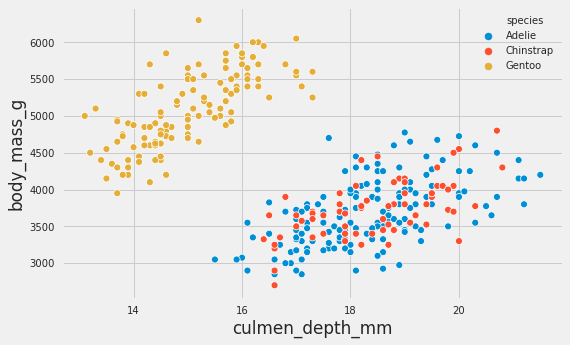

In [17]:
print('culmen_depth vs body_mass')
sns.scatterplot(data=data, x='culmen_depth_mm', y='body_mass_g', hue='species')
plt.show()

culmen_length vs body_mass


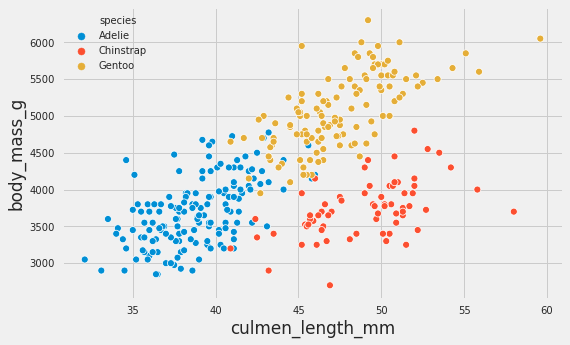

In [18]:
print('culmen_length vs body_mass')
sns.scatterplot(data=data, x='culmen_length_mm', y='body_mass_g', hue='species')
plt.show()

flipper_length vs body_mass


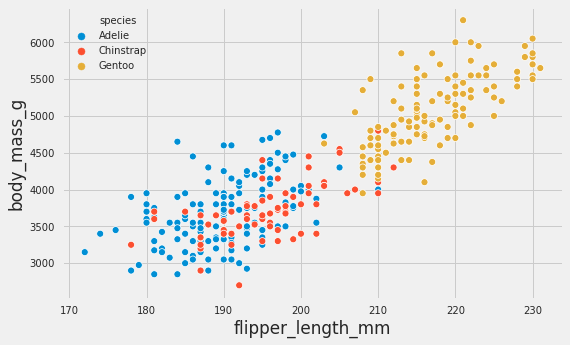

In [19]:
print('flipper_length vs body_mass')
sns.scatterplot(data=data, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.show()

Pairplot


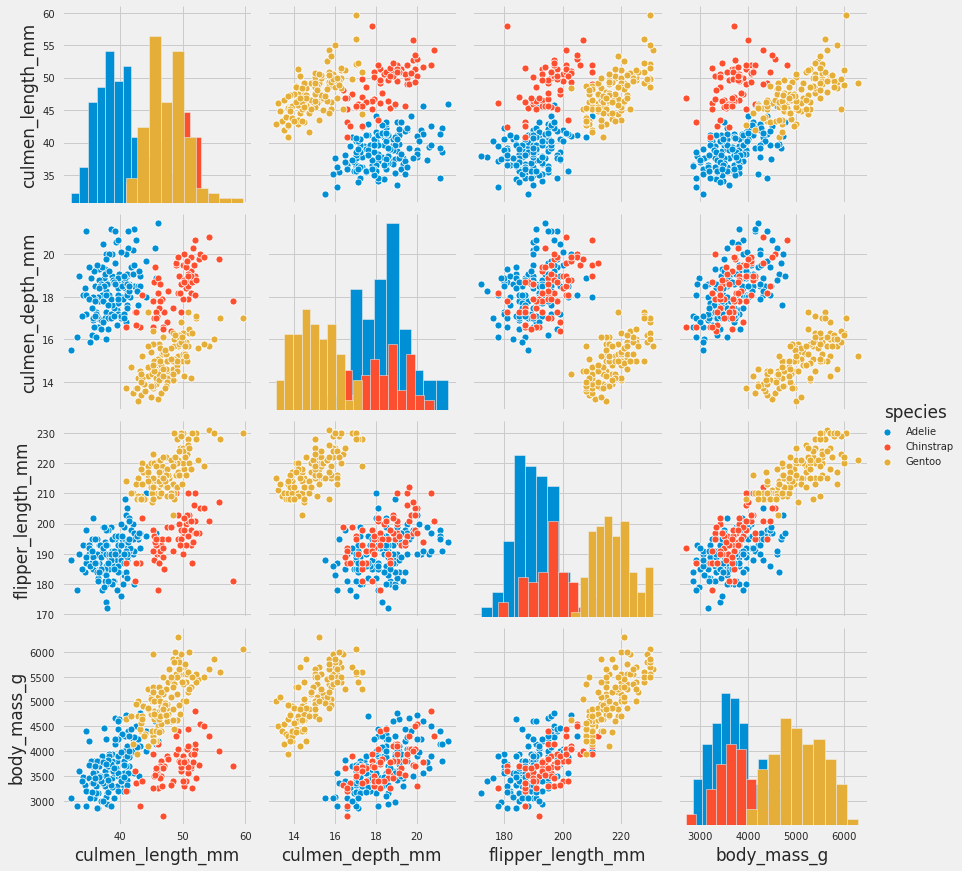

In [20]:
print('Pairplot')
sns.pairplot(data=data[['species','culmen_length_mm','culmen_depth_mm','flipper_length_mm', 'body_mass_g']], hue="species", height=3, diag_kind="hist")
plt.show()